In [1]:
using Plots, DSP, LinearAlgebra, LaTeXStrings

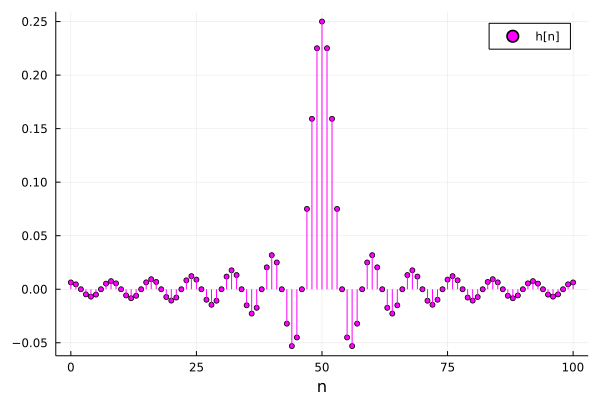

In [2]:
N = 101
n = 0:N - 1
L = (N - 1) ÷ 2
ωc = π/4
h = (ωc/π) * sinc.( (ωc / π) * (n .- L))

plot(n, h, line = :stem, marker = (:circle, 3), xlabel = "n", label = "h[n]", color = :magenta)



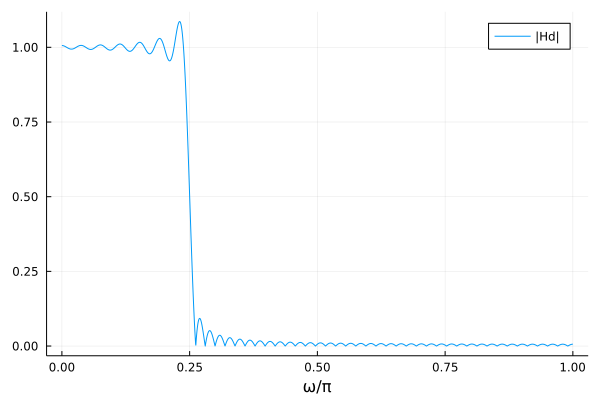

In [3]:
hdf = PolynomialRatio(h, [1])
ω = range(0, π, length = 2500)
Hd = freqresp(hdf, ω)
plot(ω / π, abs.(Hd), label = "|Hd|", xlabel = "ω/π")

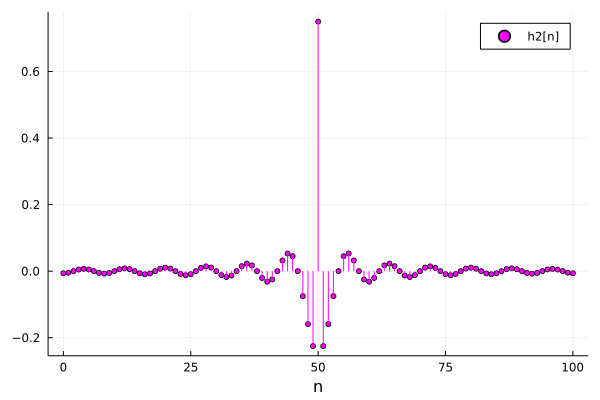

In [4]:
n2 = 0:N - 1
h2 = ((π-ωc)/π) * sinc.( ((π-ωc)/π) * (n2 .- L)) .* (-1).^(n2)
plot(n2, h2, line = :stem, marker = (:circle, 3), xlabel = "n", label = "h2[n]", color = :magenta)

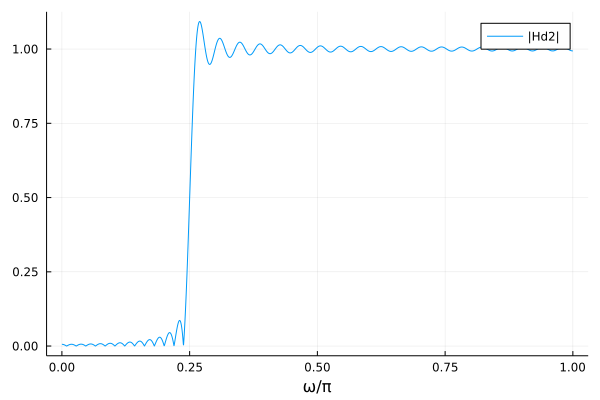

In [5]:
hdf2 = PolynomialRatio(h2, [1])
ω = range(0, π, length = 2500)
Hd2 = freqresp(hdf2, ω)
plot(ω / π, abs.(Hd2), label = "|Hd2|", xlabel = "ω/π")

In [6]:
function filtro(h, x)
    y = zeros(length(x))
    N = length(h)
    k = length(x)
    for n in 1:k
        for i in 0:n-1
            y[n] = y[n] + h[i+1]*x[n-i]
        end
    end
    
    return y
            
end
    

filtro (generic function with 1 method)

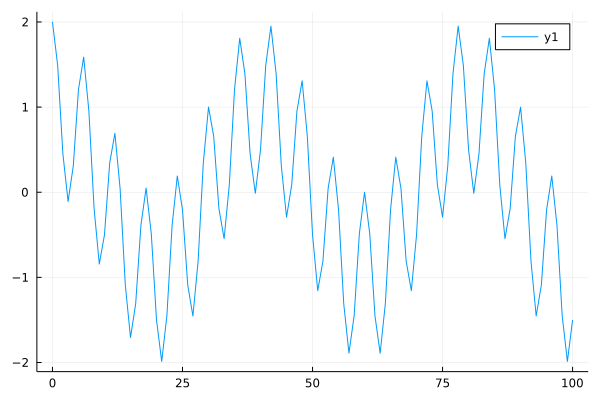

In [7]:
x = cos.(π*n/20) + cos.(π*n/3);
plot(n, x)

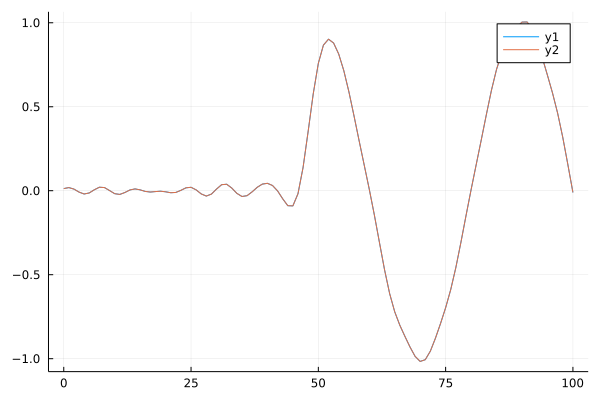

In [8]:
y11 = filtro(h, x);
y12 = filt(h, [1], x)

plot(n, y11)
plot!(n, y12)

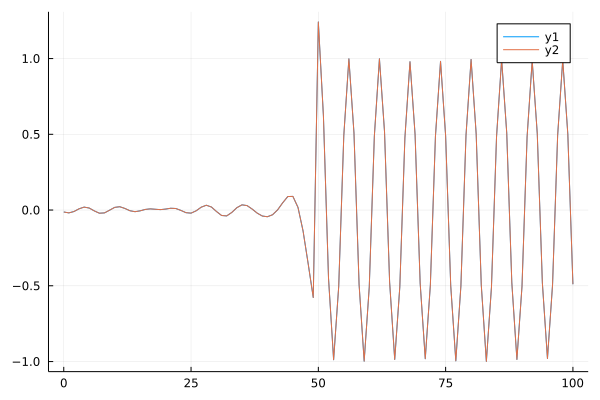

In [9]:
y21 = filtro(h2, x);
y22 = filt(h2, [1], x)

plot(n, y21)
plot!(n, y22)

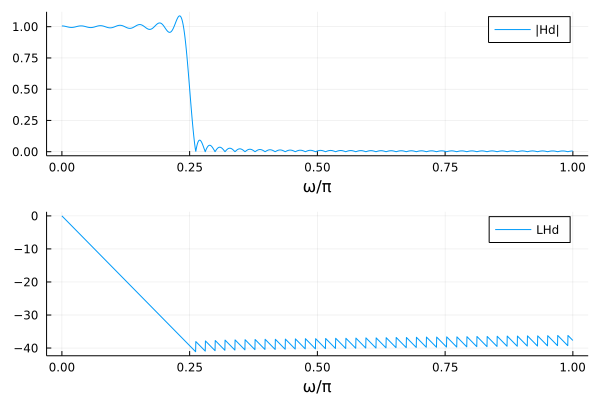

In [10]:
p1 = plot(ω / π, abs.(Hd), label = "|Hd|", xlabel = "ω/π")
pHd = phaseresp(hdf, ω)
p2 = plot(ω / π, unwrap(pHd), label = "LHd", xlabel = "ω/π")
plot(p1, p2, layout=(2,1))

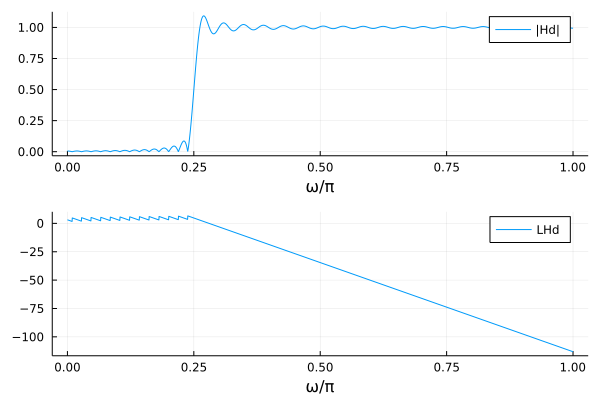

In [11]:
p1 = plot(ω / π, abs.(Hd2), label = "|Hd|", xlabel = "ω/π")
pHd2 = phaseresp(hdf2, ω)
p2 = plot(ω / π, unwrap(pHd2), label = "LHd", xlabel = "ω/π")
plot(p1, p2, layout=(2,1))

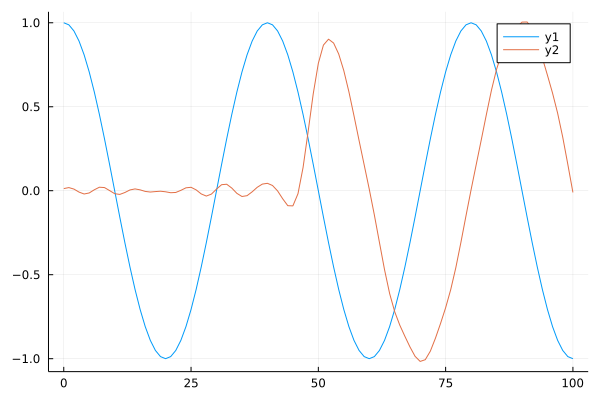

In [12]:
x1 = cos.(π*n/20)
x2 = cos.(π*n/3)
plot(n, x1)
plot!(n, y11)

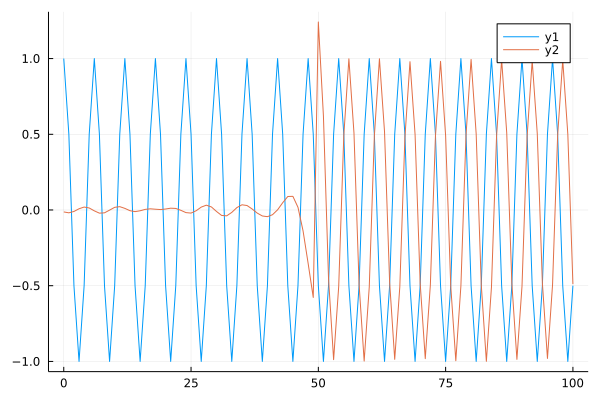

In [13]:
plot(n, x2)
plot!(n, y21)

# Filtro Passa Baixas com Janela de Kaiser

In [45]:
ωp = π/20
ωr = π/3
ωc = (ωp + ωr)/2

A = -20*log10(0.001)
print(A)
β = 0.1102*(A-8.7)


60.0

5.65326

In [46]:
N = (A-8)/(2.285*(ωr-ωp))+1
N = Int64(ceil(N))

27

In [47]:
M=N-1
L=(N-1)/2

13.0

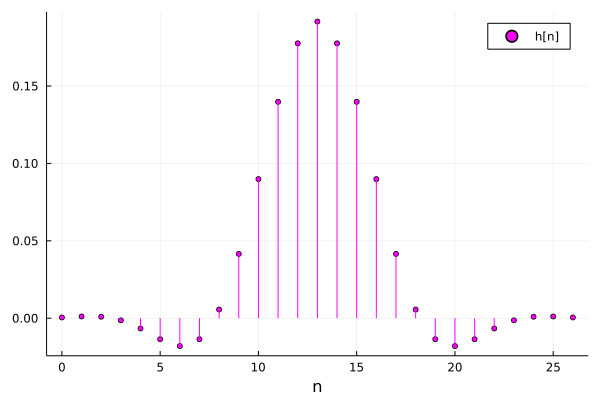

In [48]:
n=0:M
h=(ωc/π)*sinc.((ωc/π)*(n.-L)).*kaiser(N,β/π)

plot(n, h, line = :stem, marker = (:circle, 3), xlabel = "n", label = "h[n]", color = :magenta)

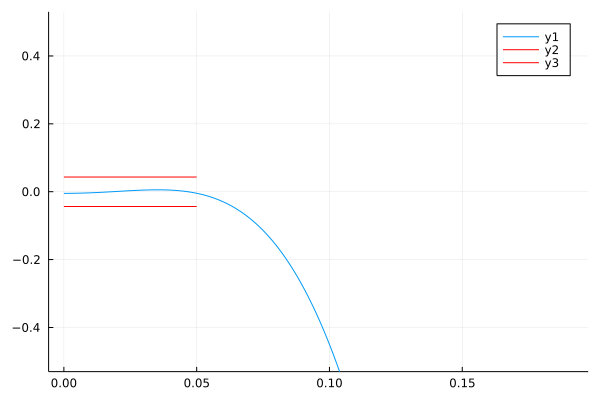

In [49]:
hf=PolynomialRatio(h,[1])
ω=range(0,π,length=5000)
H=freqz(hf,ω)
plot(ω/π,20*log10.(abs.(H)), xlim = [0 , ωc/π], ylim = [-0.5, 0.5])
plot!([0;ωp/π],20*log10.([0.995;0.995]),color="red")
plot!([0;ωp/π],20*log10.([1.005;1.005]),color="red")

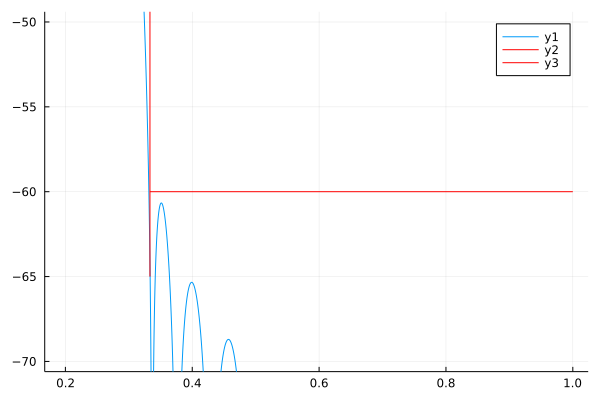

In [50]:
plot(ω/π,20*log10.(abs.(H)), xlim = [ωc/π,1], ylim = [-A-10,-A+10])
plot!([ωr;π]/π,20*log10.([0.001;0.001]),color="red")
plot!([ωr;ωr]/π,[-65;5],color="red")


# Filtro Passa altas com Janela de Kaiser

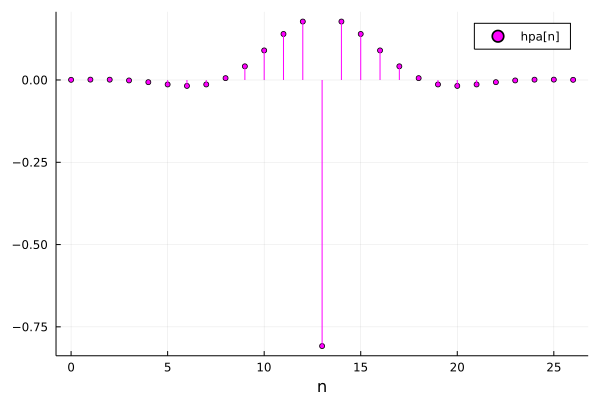

In [51]:
ωp_h = π - π/20
ωr_h = π - π/3
ωc_h = (ωp_h + ωr_h)/2

hpa=(ωc_h/π)*sinc.((ωc_h/π)*(n .- L)).*(-1).^(0:M).*kaiser(N,β/π)
hfpa=PolynomialRatio(hpa,[1])
plot(n, hpa, line = :stem, marker = (:circle, 3), xlabel = "n", label = "hpa[n]", color = :magenta)

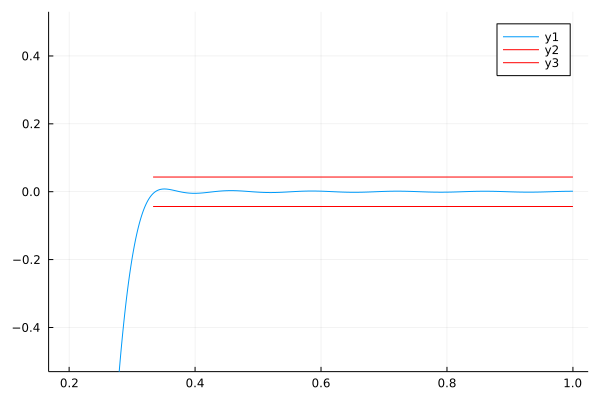

In [52]:
Hpa=freqz(hfpa,ω)
plot(ω/π,20*log10.(abs.(Hpa)), xlim = [ωc/π, 1], ylim = [-0.5, 0.5])
plot!([ωr/π;1],20*log10.([0.995;0.995]),color="red")
plot!([ωr/π;1],20*log10.([1.005;1.005]),color="red")

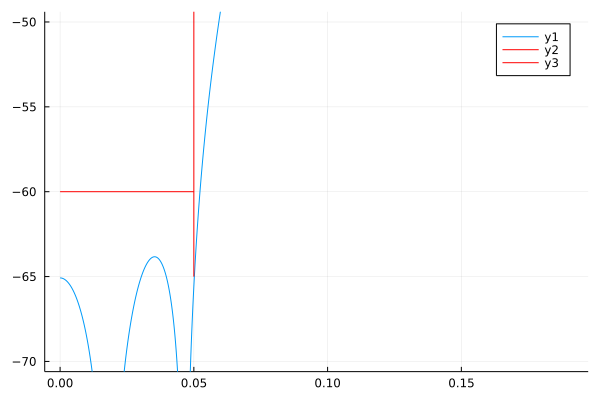

In [53]:
plot(ω/π,20*log10.(abs.(Hpa)), xlim = [0,ωc/π], ylim = [-A-10,-A+10])
plot!([0;ωp]/π,20*log10.([0.001;0.001]),color="red")
plot!([ωp;ωp]/π,[-65;5],color="red")